In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
st=pd.read_csv("/kaggle/input/student-stress-factors/Student Stress Factors.csv")
st.head()

,Timestamp,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,27/10/2023 21:54:15,3,1,3,4,2,3
1,28/10/2023 12:24:40,4,1,2,3,3,2
2,28/10/2023 12:24:51,2,1,2,1,4,4
3,28/10/2023 12:26:11,3,2,3,2,3,3
4,28/10/2023 12:26:45,2,3,1,5,5,3


In [3]:
st.drop("Timestamp", axis=1, inplace=True)


In [4]:
st.columns

Index(['Kindly Rate your Sleep Quality 😴',
       'How many times a week do you suffer headaches 🤕?',
       'How would you rate you academic performance 👩‍🎓?',
       'how would you rate your study load?',
       'How many times a week you practice extracurricular activities 🎾?',
       'How would you rate your stress levels?'],
      dtype='object')

In [5]:
st.rename(columns={
                 "Kindly Rate your Sleep Quality 😴": "sleep_quality", 
                 "How many times a week do you suffer headaches 🤕?": "headache", 
                 "How would you rate you academic performance 👩‍🎓?": "academic", 
                 "how would you rate your study load?": "study_load", 
                 "How many times a week you practice extracurricular activities 🎾?": "extra_act", 
                 "How would you rate your stress levels?": "stress_level"}, inplace=True)

In [6]:
st.head()

,sleep_quality,headache,academic,study_load,extra_act,stress_level
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [7]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())


check_df(st)


##################### Shape #####################
(53, 6)
##################### Types #####################
sleep_quality    int64
headache         int64
academic         int64
study_load       int64
extra_act        int64
stress_level     int64
dtype: object
##################### Head #####################
   sleep_quality  headache  academic  study_load  extra_act  stress_level
0              3         1         3           4          2             3
1              4         1         2           3          3             2
2              2         1         2           1          4             4
3              3         2         3           2          3             3
4              2         3         1           5          5             3
##################### Tail #####################
    sleep_quality  headache  academic  study_load  extra_act  stress_level
48              3         3         4           4          4             3
49              1         1         1           

In [8]:
st.shape

(53, 6)

In [9]:
st.isna().sum()

sleep_quality    0
headache         0
academic         0
study_load       0
extra_act        0
stress_level     0
dtype: int64

count    53.000000
mean      3.150943
std       1.199298
min       1.000000
5%        1.000000
10%       2.000000
20%       2.000000
30%       2.000000
40%       3.000000
50%       3.000000
60%       3.000000
70%       4.000000
80%       4.000000
90%       5.000000
95%       5.000000
99%       5.000000
max       5.000000
Name: sleep_quality, dtype: float64


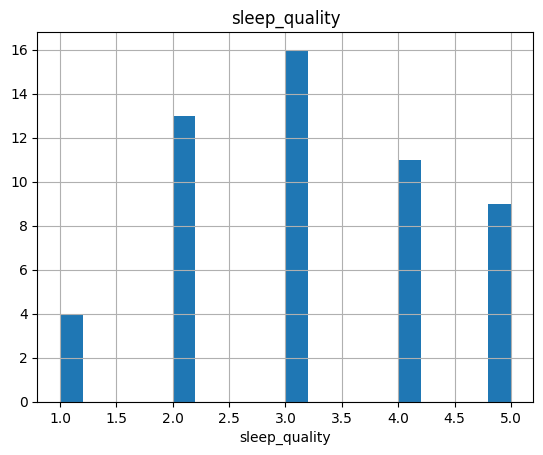

count    53.000000
mean      1.981132
std       1.263246
min       1.000000
5%        1.000000
10%       1.000000
20%       1.000000
30%       1.000000
40%       1.000000
50%       1.000000
60%       2.000000
70%       3.000000
80%       3.000000
90%       4.000000
95%       4.400000
99%       5.000000
max       5.000000
Name: headache, dtype: float64


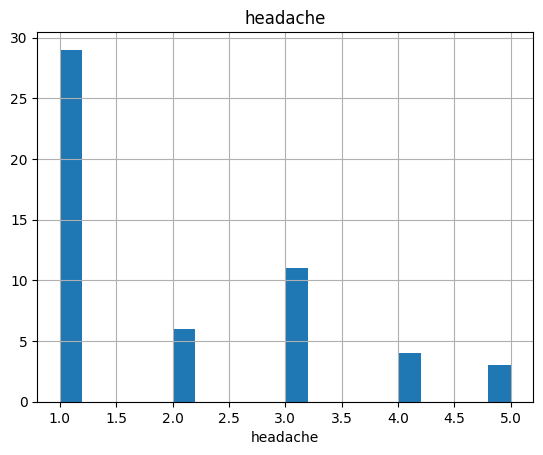

count    53.000000
mean      3.226415
std       1.154281
min       1.000000
5%        1.000000
10%       1.200000
20%       2.400000
30%       3.000000
40%       3.000000
50%       3.000000
60%       4.000000
70%       4.000000
80%       4.000000
90%       5.000000
95%       5.000000
99%       5.000000
max       5.000000
Name: academic, dtype: float64


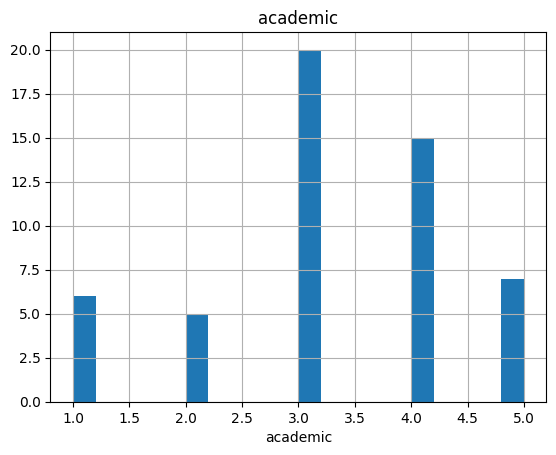

count    53.000000
mean      2.811321
std       1.428509
min       1.000000
5%        1.000000
10%       1.000000
20%       1.000000
30%       2.000000
40%       2.000000
50%       2.000000
60%       3.200000
70%       4.000000
80%       4.000000
90%       5.000000
95%       5.000000
99%       5.000000
max       5.000000
Name: study_load, dtype: float64


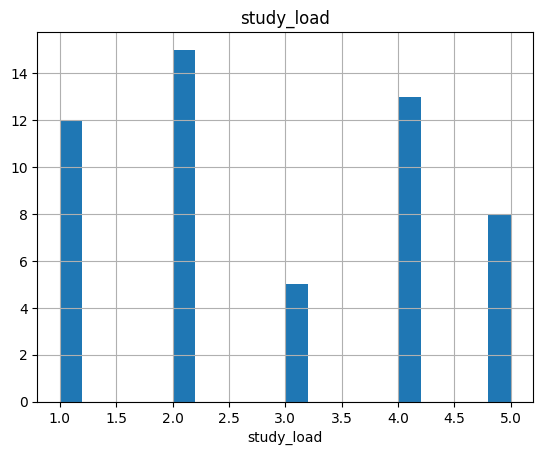

count    53.000000
mean      2.886792
std       1.449939
min       1.000000
5%        1.000000
10%       1.000000
20%       1.000000
30%       2.000000
40%       2.000000
50%       3.000000
60%       3.000000
70%       4.000000
80%       4.600000
90%       5.000000
95%       5.000000
99%       5.000000
max       5.000000
Name: extra_act, dtype: float64


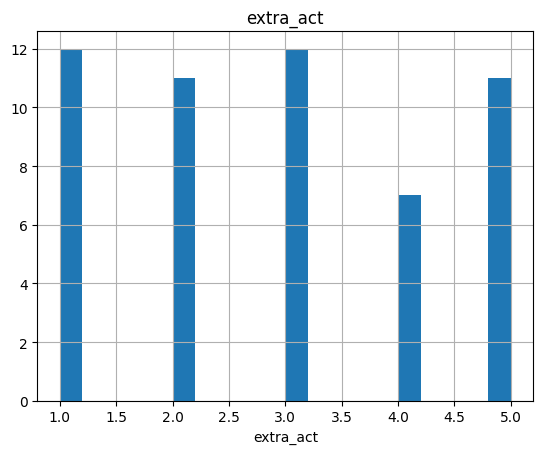

count    53.000000
mean      2.792453
std       1.377826
min       1.000000
5%        1.000000
10%       1.000000
20%       1.000000
30%       2.000000
40%       2.000000
50%       3.000000
60%       3.000000
70%       4.000000
80%       4.000000
90%       5.000000
95%       5.000000
99%       5.000000
max       5.000000
Name: stress_level, dtype: float64


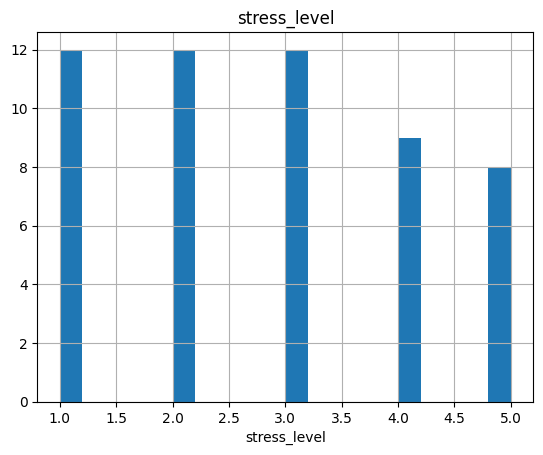

In [10]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


for col in st.columns:
    num_summary(st, col, plot=True)


In [11]:
st.groupby("study_load")["stress_level"].mean()

study_load
1    2.333333
2    2.400000
3    3.400000
4    2.692308
5    4.000000
Name: stress_level, dtype: float64

In [12]:
st.groupby("sleep_quality")["stress_level"].mean()

sleep_quality
1    1.500000
2    3.000000
3    2.437500
4    2.727273
5    3.777778
Name: stress_level, dtype: float64

In [13]:
st.groupby("academic")["stress_level"].mean()

academic
1    2.833333
2    2.200000
3    2.900000
4    3.000000
5    2.428571
Name: stress_level, dtype: float64

<Figure size 300x500 with 0 Axes>

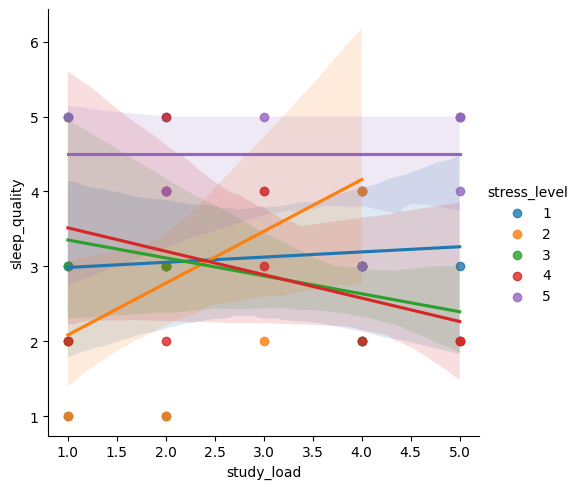

In [14]:
plt.figure(figsize=(3,5))

sns.lmplot(y="sleep_quality",x="study_load",hue="stress_level",data=st)

<Axes: >

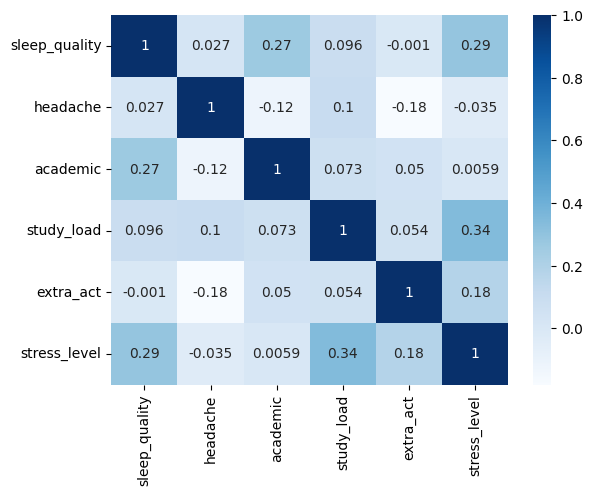

In [15]:
#correlation of various factors on stress levels
corr_matrix = st.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

<Figure size 300x500 with 0 Axes>

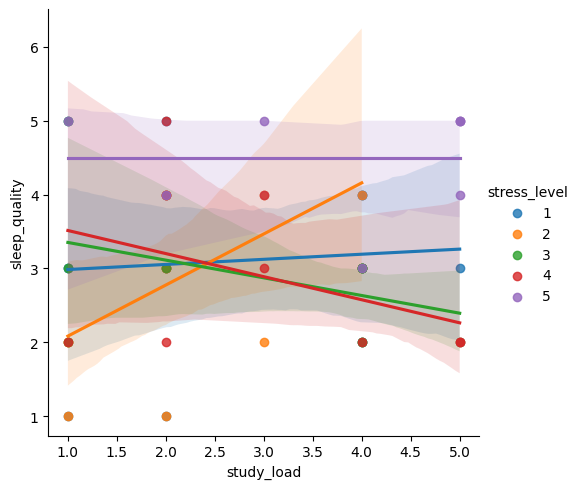

In [16]:
plt.figure(figsize=(3,5))

sns.lmplot(y="sleep_quality",x="study_load",hue="stress_level",data=st)

In [17]:
agg_df=pd.DataFrame()
agg_df["therapy"] = st["stress_level"].astype(str)+st["study_load"].astype(str)


In [18]:
agg_df["success"]=st["academic"].astype(str)+st["extra_act"].astype(str)

In [19]:
agg_df.head()

,therapy,success
0,34,32
1,23,23
2,41,24
3,32,33
4,35,15


In [20]:
agg_df["therapy"]=agg_df["therapy"].values.astype(int)


In [21]:
student_control = {
    r'[1-2][1-2]': 'mental stable and having no potential',
    r'[1-2][3-4]': 'mentally stable and lazy',
    r'[1-2]5': 'mentally stable and nerd',
    r'3[1-2]': 'average mental and not working',
    r'33': 'need theraphy and lazy',
    r'[3-4][4-5]': 'need theraphy and brilliant',
    r'41': 'need threaphy and lazy',
    r'51': 'need threaphy and mentally unstable and lazy',
    r'[4-5][2-3]': 'need threaphy and mentally unstable  and hardworking',
    r'5[4-5]': 'need theraphy and mentally unstable and nerd'
}


In [22]:
agg_df['segment'] = agg_df['therapy'].replace(student_control, regex=True)


In [23]:
agg_df['segment'] = agg_df['success'].replace(student_control, regex=True)


In [24]:
result = pd.concat([st, agg_df], axis=1) 

result=result.drop(["therapy","success"],axis=1)

In [25]:
result.head()

,sleep_quality,headache,academic,study_load,extra_act,stress_level,segment
0,3,1,3,4,2,3,average mental and not working
1,4,1,2,3,3,2,mentally stable and lazy
2,2,1,2,1,4,4,mentally stable and lazy
3,3,2,3,2,3,3,need theraphy and lazy
4,2,3,1,5,5,3,mentally stable and nerd


In [26]:
report=result[result["segment"].str.contains("unstable")]
report

,sleep_quality,headache,academic,study_load,extra_act,stress_level,segment
10,2,3,5,5,2,4,need threaphy and mentally unstable and hardw...
11,3,1,5,1,4,1,need theraphy and mentally unstable and nerd
21,3,3,4,4,3,3,need threaphy and mentally unstable and hardw...
23,3,1,4,4,2,3,need threaphy and mentally unstable and hardw...
26,5,1,5,1,5,5,need theraphy and mentally unstable and nerd
27,5,5,5,1,1,1,need threaphy and mentally unstable and lazy
32,5,5,4,5,2,5,need threaphy and mentally unstable and hardw...
33,2,3,4,1,2,2,need threaphy and mentally unstable and hardw...
34,4,1,5,4,5,2,need theraphy and mentally unstable and nerd
35,5,1,4,3,2,5,need threaphy and mentally unstable and hardw...


In [27]:
report.to_csv('out.csv')


## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
#splitting the data into training and testing sets (70% training and 30% testing)
from sklearn.model_selection import train_test_split,cross_val_score

x=st.drop("stress_level",axis=1)
y=st["stress_level"]

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [29]:
X_train.shape

(37, 5)

In [30]:
X_test.shape

(16, 5)

In [31]:
mlr = LinearRegression()
mlr.fit(X_train,Y_train)

LinearRegression()

In [32]:
mlr.coef_
mlr.intercept_

1.3697319178220086

In [33]:
mlr.score(X_train,Y_train)*100

34.017201075753455

In [34]:
predicted = mlr.predict(x).astype(int)

In [35]:
predicted

array([3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 1, 2, 1, 1, 2,
       2, 3, 2, 2, 3, 1, 1, 1, 4, 2, 2, 1, 3, 3, 3, 1, 2, 3, 1, 3, 3, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2])

In [36]:
prediction_df = pd.DataFrame({'prediction': predicted})



In [37]:
prediction_df.head()

,prediction
0,3
1,3
2,2
3,2
4,3
